In [1]:
import pandas as pd
import pymssql
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.optimize import curve_fit

In [2]:
def ms_sql_con():
    sql_name = 'voice_ai'
    sql_server = '10.2.4.124'
    sql_login = 'ICECORP\\1c_sql'

    with open('sql.pass','r') as file:
        sql_pass = file.read().replace('\n', '')
        file.close()

    return pymssql.connect(
            server = sql_server,
            user = sql_login,
            password = sql_pass,
            database = sql_name,
        )

In [16]:
def read_sql():
    return pd.read_sql(query, con=ms_sql_con(), parse_dates=None)

In [81]:
def phrases_per_hour(date_from, date_to, phrase):
    query = "select month(record_date) as m,  day(record_date) as d, DATEPART(HOUR, record_date) as h, count(id) as c" 
    query += " from transcribations where "
    query += " record_date > "+date_from+" and "
    query += " record_date < "+date_to+" and "
    query += " text like '%"+phrase+"%' "
    query += " group by month(record_date), day(record_date), DATEPART(HOUR, record_date)"
    query += " order by month(record_date), day(record_date), DATEPART(HOUR, record_date);"
    df = read_sql()
    
    df.drop(['m', 'd'], axis = 1, inplace = True)
    df = df.groupby(df.h).median()
    df.reset_index(level=0, inplace=True)
    
    plt.bar(df.h, df.c)
    plt.show()

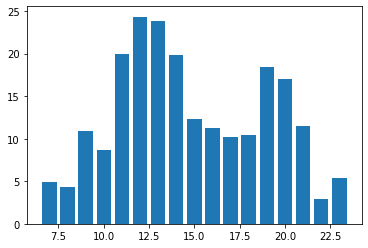

In [84]:
phrases_per_hour('2021-02-01 00:00:00', '2021-02-03 00:00:00', 'операторы заняты')